This exercise will be a guided tour of *feature engineering* in Python. Remember, feature engineering is the process of taking existing data and, through calculations, creating more features. The idea is that new features may be more useful or telling than the existing data on its own. For example, if we have loan data, calculating an LTV ([loan-to-value](https://www.investopedia.com/terms/l/loantovalue.asp)) ratio for a mortgage application can tell us more about the risk of making a loan than knowing only the loan amount requested or the value of the underlying home. 

The data will be the popular [Ames home pricing dataset](https://www.kaggle.com/prevek18/ames-housing-dataset), which includes data on nearly 3,000 properties sold in Ames, Iowa. There are several versions of this dataset floating around, so for consistency please use the version posted on Canvas. 

------------------------------------------------------------------------------

### Import data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# load dataset using Pandas

ames_housing = pd.read_csv('ames_housing.csv')

### Examine dataset

In [3]:
# examine the dataset using info, describe and head

ames_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [17]:
ames_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

There are 82 columns. The following columns have some null values: Lot Frontage, Alley, Mas Vnr Type, Mas Vnr Area...

In [18]:
ames_housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Remove outliers and check how many rows are left

In [3]:
# Use Pandas subsetting to remove homes with sq ft > 4000 and assign output to new dataframe 

under_4000 = ames_housing[ames_housing['Gr Liv Area'] <= 4000]
under_4000['Gr Liv Area'].describe()

count    2925.000000
mean     1493.978803
std       486.273646
min       334.000000
25%      1126.000000
50%      1441.000000
75%      1740.000000
max      3820.000000
Name: Gr Liv Area, dtype: float64

In [4]:
# Print out the shape of the dataset for the original dataset and the new dataset with sq ft > 4000 removed 

print(ames_housing.shape)
print(under_4000.shape)

(2930, 82)
(2925, 82)


### Use `loc` to select only a few columns for modeling

In [5]:
# use Pandas loc to create a new DataFrame with only a few columns

new_ames_housing = under_4000.loc[ : , ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', \
                                        'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', \
                                        'Garage Cars', 'SalePrice'] ]
new_ames_housing.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000
3,11160,7,5,1968,1968,2110,2,3,2,2.0,244000
4,13830,5,5,1997,1998,1629,2,3,1,2.0,189900


### Fill missing values with 0

In [6]:
# check for null values

new_ames_housing.isnull().any()

Lot Area          False
Overall Qual      False
Overall Cond      False
Year Built        False
Year Remod/Add    False
Gr Liv Area       False
Full Bath         False
Bedroom AbvGr     False
Fireplaces        False
Garage Cars        True
SalePrice         False
dtype: bool

In [7]:
# fill in missing NA in Garage Cars with zero 

filled_na = new_ames_housing.fillna(value = {'Garage Cars' : 0})

In [24]:
# use .info() to check that our null has been filled in 

filled_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


### More EDA with a pairplot

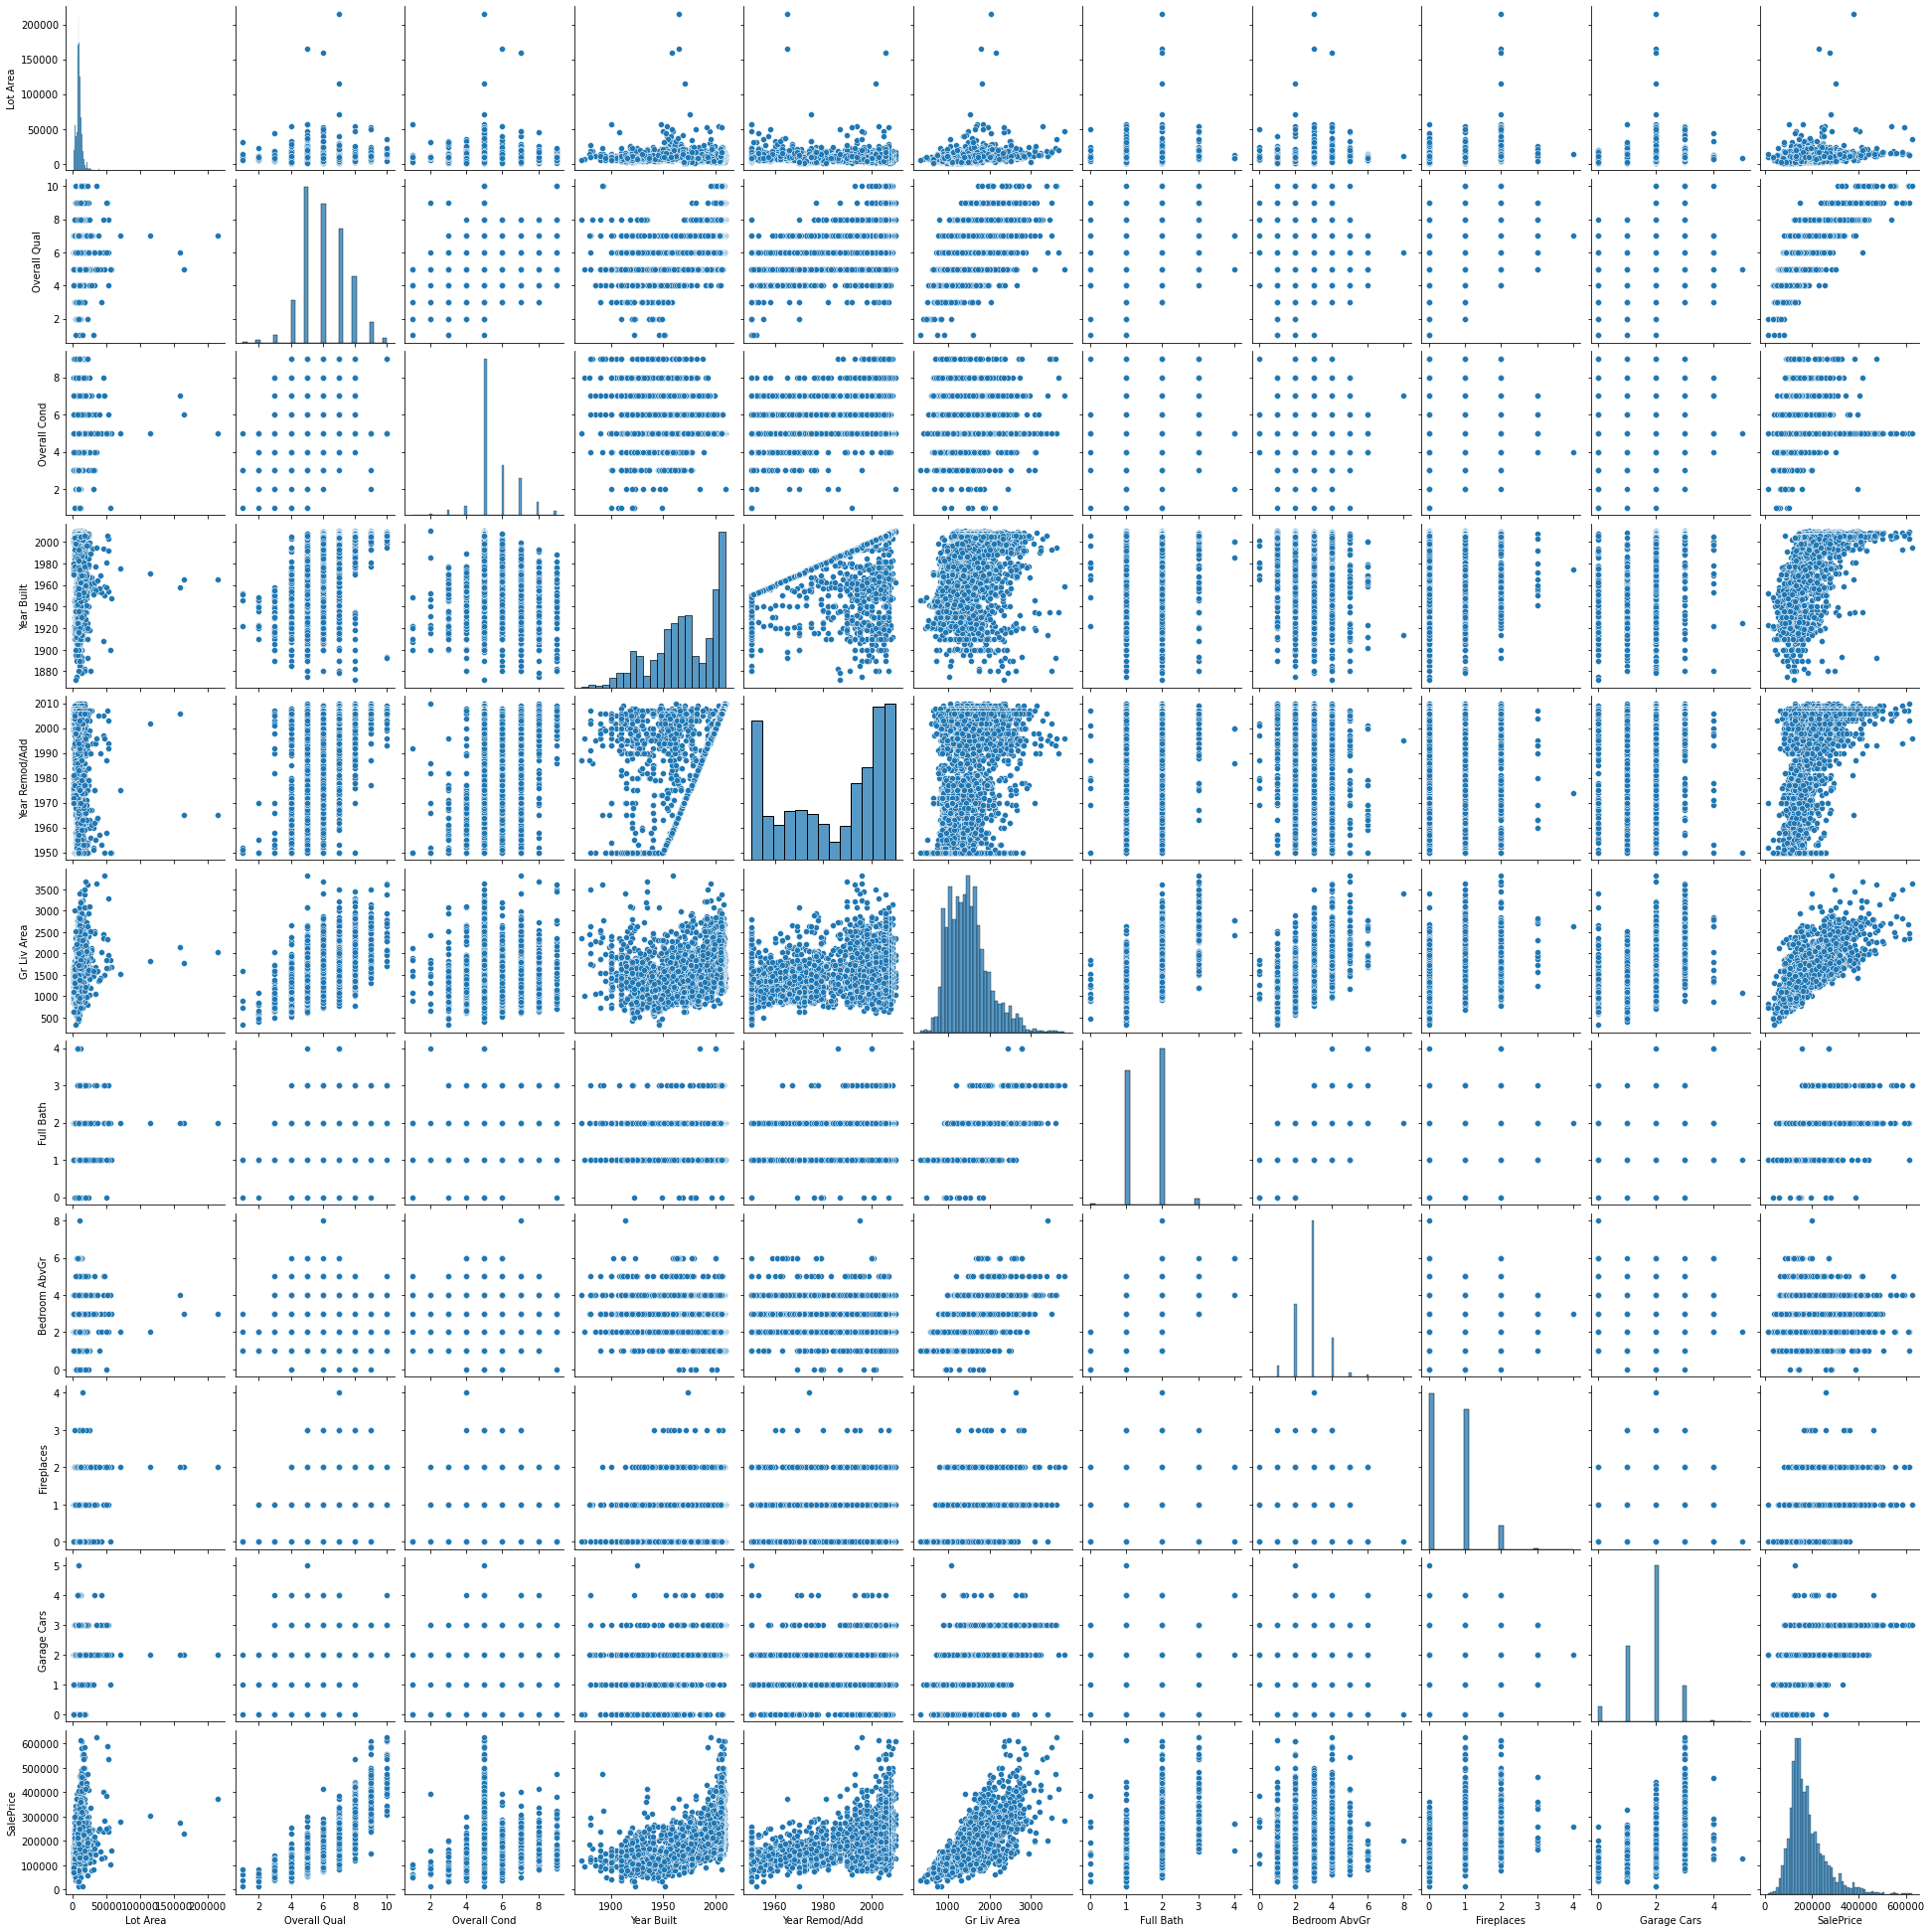

In [25]:
# sns pairplot

sns.pairplot(filled_na)

### Write a function to run a linear regression and report metrics

In [9]:
from sklearn.linear_model import LinearRegression

def run_linear_regression(X, y):
    '''
    Fit a linear regression model on input data
    Print the R-squared score for the model 
    '''
    
    # Fit linear regression on X, y inputs
    lr_model = LinearRegression()
    lr_model.fit(X,y)  # fill in the # with the method for fitting a function and the parameters for the fit
    
    # Calculate the r-squared metric for the regression
    score = lr_model.score(X, y) #what's the method to get r-squared back for a regression? read the sklearn documentation if needed
    
    # Print output so we can track our model
    # don't change the below, it's just printing code
    print('\nR-squared = ', score)
    print('Feature coefficients (aka slopes): \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

### Create an (X,y) modeling dataset and run a baseline regression

In [10]:
# create X and y inputs 

X = filled_na.loc[ : , ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', \
                        'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars']]
y = filled_na['SalePrice']

In [11]:
# use our run_linear_regression(X,y) function from above to run a baseline regression

run_linear_regression(X, y)


R-squared =  0.8209657288247497
Feature coefficients (aka slopes): 

Lot Area : 1.12
Overall Qual : 19822.78
Overall Cond : 4652.05
Year Built : 521.17
Year Remod/Add : 140.04
Gr Liv Area : 77.05
Full Bath : -9550.70
Bedroom AbvGr : -12227.20
Fireplaces : 6380.78
Garage Cars : 10424.23


### Feature engineering: polynomial terms 

In [12]:
# square overall qual and gr liv area

X2 = X.copy()

X2['qual_squared'] = X2['Overall Qual'] ** 2
X2['liv_area_squared'] = X2['Gr Liv Area'] ** 2

In [13]:
# run regression with new dataset 

run_linear_regression(X2, y)


R-squared =  0.8656844266305183
Feature coefficients (aka slopes): 

Lot Area : 1.07
Overall Qual : -49930.23
Overall Cond : 8217.49
Year Built : 616.82
Year Remod/Add : 100.05
Gr Liv Area : 20.02
Full Bath : -6544.11
Bedroom AbvGr : -5564.04
Fireplaces : 9135.03
Garage Cars : 9138.90
qual_squared : 5747.78
liv_area_squared : 0.01


### Feature engineering: interaction terms 

In [14]:
X3 = X2.copy()

# multiplicative interaction

X3['cond_year_built'] = X3['Overall Cond'] * X3['Year Built']

# division interaction

X3['liv_area_by_lot_area'] = X3['Gr Liv Area'] / X3['Lot Area']

In [15]:
# re-run the regression and note the r-squared

run_linear_regression(X3, y)


R-squared =  0.8725615790420866
Feature coefficients (aka slopes): 

Lot Area : 0.64
Overall Qual : -47526.44
Overall Cond : 43539.22
Year Built : 743.51
Year Remod/Add : 89.07
Gr Liv Area : 30.21
Full Bath : -5769.77
Bedroom AbvGr : -7001.60
Fireplaces : 8594.47
Garage Cars : 7433.98
qual_squared : 5541.97
liv_area_squared : 0.01
cond_year_built : -18.21
liv_area_by_lot_area : -65632.27


### Feature engineering: dummy variables

In [16]:
# pick some categorical variables from the original dataset and use value_counts() to see how varied they are 

ames_housing['Sale Condition'].value_counts()

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

### Feature engineering: add dummy variables to model 

In [17]:
# add dummy variables for one of the categorical features explored above 

X3['Sale Condition'] = ames_housing['Sale Condition']
X4 = pd.get_dummies(data = X3, columns=['Sale Condition'])
X4.head(4)

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,qual_squared,liv_area_squared,cond_year_built,liv_area_by_lot_area,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,31770,6,5,1960,1960,1656,1,3,2,2.0,36,2742336,9800,0.052125,0,0,0,0,1,0
1,11622,5,6,1961,1961,896,1,2,0,1.0,25,802816,11766,0.077095,0,0,0,0,1,0
2,14267,6,6,1958,1958,1329,1,3,0,1.0,36,1766241,11748,0.093152,0,0,0,0,1,0
3,11160,7,5,1968,1968,2110,2,3,2,2.0,49,4452100,9840,0.189068,0,0,0,0,1,0


In [18]:
# run a new linear regression with the new dummified dataset! 

run_linear_regression(X4, y)


R-squared =  0.8771488900268017
Feature coefficients (aka slopes): 

Lot Area : 0.65
Overall Qual : -45852.19
Overall Cond : 25021.36
Year Built : 668.07
Year Remod/Add : 52.29
Gr Liv Area : 29.06
Full Bath : -6343.02
Bedroom AbvGr : -6756.64
Fireplaces : 8944.96
Garage Cars : 7204.19
qual_squared : 5355.65
liv_area_squared : 0.01
cond_year_built : -8.68
liv_area_by_lot_area : -63313.34
Sale Condition_Abnorml : -12756.24
Sale Condition_AdjLand : 12428.03
Sale Condition_Alloca : -4977.58
Sale Condition_Family : -8281.28
Sale Condition_Normal : -1947.69
Sale Condition_Partial : 15534.77


### Feature engineering: replace categories with low counts with "other"

In [19]:
# value counts on neighbohood feature

ames_housing['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [23]:
# add Neighborhood to modeling dataset

X5 = X4.copy()
X5['Neighborhood'] = ames_housing['Neighborhood']

In [24]:
# replace neighborhoods with low observation count with "other neighborhood"

neighbs_count = X5['Neighborhood'].value_counts()
low_count_neighbs =  neighbs_count[neighbs_count <= 10]
low_count_neighbs

Blueste    10
Greens      8
GrnHill     2
Landmrk     1
Name: Neighborhood, dtype: int64

In [ ]:
list_low_count_neighbs = list(low_count_neighbs.index)
list_low_count_neighbs

In [ ]:
X5['Neighborhood'] = X5['Neighborhood'].replace(list_low_count_neighbs, "Other neighborhood")
X5['Neighborhood'].unique()

In [64]:
# re-run the regression and see if it improved 

X5 = pd.get_dummies(data = X5, columns=['Neighborhood'] )
run_linear_regression(X5, y)


R-squared =  0.8910484107336861
Feature coefficients (aka slopes): 

Lot Area : 0.57
Overall Qual : -36179.76
Overall Cond : 48367.53
Year Built : 766.57
Year Remod/Add : 108.35
Gr Liv Area : 33.32
Full Bath : -3855.95
Bedroom AbvGr : -5878.78
Fireplaces : 8103.39
Garage Cars : 6967.38
qual_squared : 4318.51
liv_area_squared : 0.01
cond_year_built : -20.91
liv_area_by_lot_area : -85113.98
Sale Condition_Abnorml : -12512.19
Sale Condition_AdjLand : 13382.85
Sale Condition_Alloca : -3068.01
Sale Condition_Family : -7361.20
Sale Condition_Normal : -2263.68
Sale Condition_Partial : 11822.23
Neighborhood_Blmngtn : -4002.15
Neighborhood_BrDale : 10763.55
Neighborhood_BrkSide : 1639.95
Neighborhood_ClearCr : 2800.47
Neighborhood_CollgCr : -8613.12
Neighborhood_Crawfor : 16519.35
Neighborhood_Edwards : -7309.94
Neighborhood_Gilbert : -21853.82
Neighborhood_IDOTRR : -7853.87
Neighborhood_MeadowV : 4094.33
Neighborhood_Mitchel : -9052.70
Neighborhood_NAmes : -2761.08
Neighborhood_NPkVill : 7489